We will implement a CNN to detect whether a person is smiling or not

In [1]:
import numpy as np
import h5py

import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation, Dropout
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

import seaborn as sns

Using TensorFlow backend.


In [2]:
#function to load data
def load_dataset():
    train_data = h5py.File('train_happy.h5', "r")
    x_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    test_data = h5py.File('test_happy.h5', "r")
    x_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return x_train, y_train, x_test, y_test

In [3]:
# Load the data
X_train, Y_train, X_test, Y_test = load_dataset()

Example of an image

y = 1


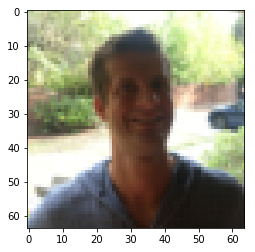

In [4]:
index = 1
plt.imshow(X_train[index])
print ("y = " + str(np.squeeze(Y_train[:, index])))

In [5]:
#check the shape of our data
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(600, 64, 64, 3)
(150, 64, 64, 3)
(1, 600)
(1, 150)


In [6]:
#Rescale data
X_train = X_train/255.
X_test = X_test/255.
Y_train = Y_train.T
Y_test = Y_test.T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Let us now implement our CNN. The architecture is:

- Input 64x64x3
- Conv layer 1 with 64 filters, kernel size (5,5) and activation function  relu
- MaxPool layer with pool siz (2,2)
- Dropout with rate 0.1
- Conv layer 2 with 64 filters, kernel size (5,5) and activation function  relu
- MaxPool layer with pool siz (2,2)
- Dropout with rate 0.1
- FC layer with 128 units
- output layer with activation function sigmoid

In [7]:
model = Sequential()

#Conv layer 1 
#input 64x64x3
model.add(Conv2D(64,(5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,3)))
model.add(BatchNormalization())

#Pooling layer 1
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))



#Conv layer 2
model.add(Conv2D(64, (5,5), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())


#Pooling layer 2
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

#Flatten
model.add(Flatten())

#Fully connected layer 1
model.add(Dense(128, activation = 'relu'))

#Output Layer
model.add(Dense(units = 1,kernel_initializer="uniform", activation = 'sigmoid'))


# Compiling Neural Network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
model.fit(X_train, Y_train, batch_size=20, epochs=35)

Epoch 1/35
600/600 [==============================] - 21s 35ms/step - loss: 0.7239 - acc: 0.7033
Epoch 2/35
600/600 [==============================] - 17s 28ms/step - loss: 0.2766 - acc: 0.8700
Epoch 3/35
600/600 [==============================] - 24s 41ms/step - loss: 0.1905 - acc: 0.9200
Epoch 4/35
600/600 [==============================] - 19s 31ms/step - loss: 0.1595 - acc: 0.9417
Epoch 5/35
600/600 [==============================] - 18s 30ms/step - loss: 0.1818 - acc: 0.9283
Epoch 6/35
600/600 [==============================] - 19s 31ms/step - loss: 0.1730 - acc: 0.9317
Epoch 7/35
600/600 [==============================] - 21s 35ms/step - loss: 0.1148 - acc: 0.9617
Epoch 8/35
600/600 [==============================] - 19s 31ms/step - loss: 0.1184 - acc: 0.9583
Epoch 9/35
600/600 [==============================] - 18s 30ms/step - loss: 0.0739 - acc: 0.9717
Epoch 10/35
600/600 [==============================] - 18s 29ms/step - loss: 0.0797 - acc: 0.9650
Epoch 11/35
600/600 [========

In [9]:
# Predict the test set results
Y_pred = model.predict_classes(X_test)

test accuracy: 0.9666666666666667
precision: 1.0
recall: 0.9404761904761905
f1 score: 0.9693251533742331


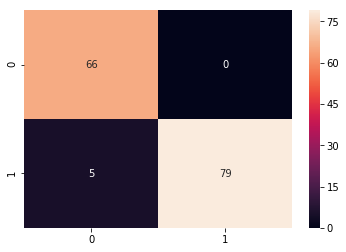

In [10]:
print 'test accuracy:', accuracy_score(Y_test, Y_pred)
print 'precision:', precision_score(Y_test, Y_pred)
print 'recall:',recall_score(Y_test, Y_pred)
print 'f1 score:', f1_score(Y_test, Y_pred)


cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)

Obtained accuracy on the test set is 96.67%